In [ ]:
Certainly! Here’s a concise summary of the theory:

Linear Regression: A statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a straight line. It minimizes the error between predicted and actual values, making it simple and interpretable.

Random Forest Regression: An ensemble method that builds multiple decision trees and combines their outputs. It’s robust, handles non-linear relationships well, and reduces overfitting by averaging predictions across trees, enhancing accuracy.

Both models are evaluated using metrics like R² (explained variance), RMSE (average error), and MAE (mean error), allowing us to compare their performance on fare predictions.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\uber_dataaset\uber.csv')

In [26]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [27]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [28]:
print(df.isna().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [29]:
df.dropna(inplace=True)

In [30]:
print(df.isna().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [32]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['pickup_day']=df['pickup_datetime'].dt.dayofweek
df['pickup_month']=df['pickup_datetime'].dt.month


In [33]:
df.drop(['Unnamed: 0' ,'key', 'pickup_datetime'], axis=1, inplace=True)

In [34]:
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  pickup_hour  pickup_day  pickup_month  
0         40.723217                1           19           3             5  
1         40.750325                1           20           4             7  
2         40.772647                1           21           0             8  
3         40.803349                3            8           4             6  
4         40.761247                5           17           3             8  


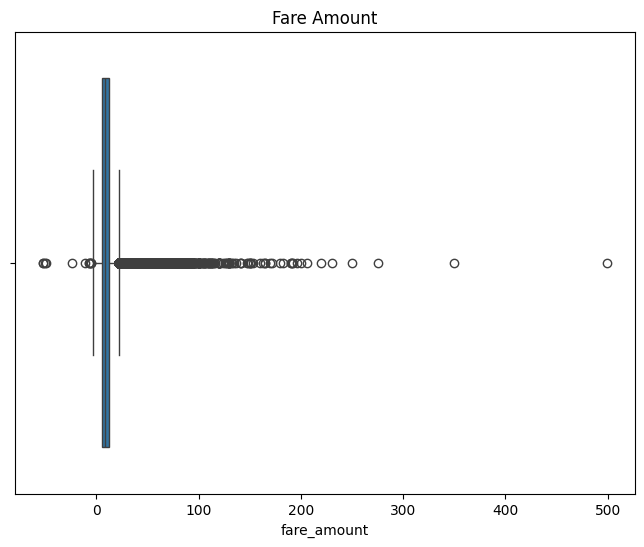

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount")
plt.show()

In [38]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)

IQR=Q3-Q1
df=df[(df['fare_amount'] >= (Q1-1.5 *IQR)) & (df['fare_amount'] <= (Q3 + 1.5*IQR))]

In [39]:
print("\nDataFrame shape after removing outliers:", df.shape)


DataFrame shape after removing outliers: (182833, 9)


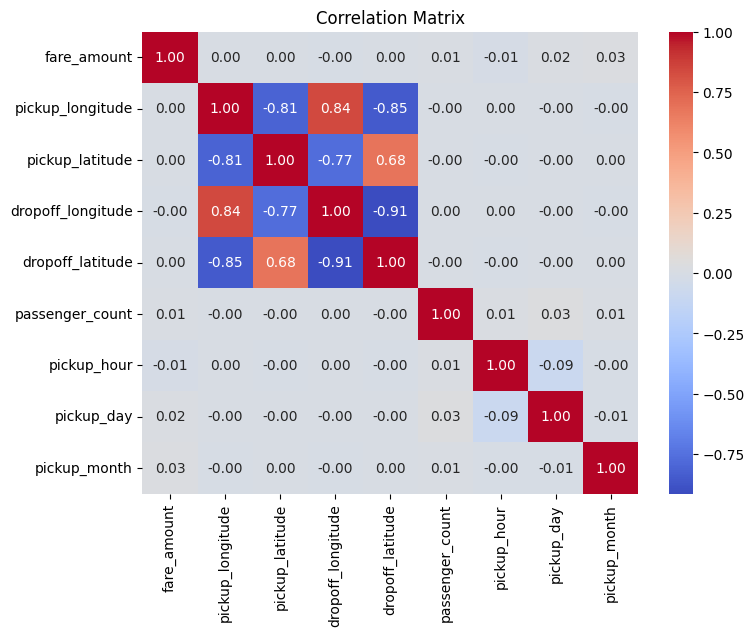

In [41]:
correlation=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [42]:
X=df.drop('fare_amount',axis=1)
y=df['fare_amount']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [46]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear=linear_model.predict(X_test)

In [44]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [45]:
print("\nLinear Regression Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

# Evaluate Random Forest Regression
print("\nRandom Forest Regression Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression Model Evaluation:
R² Score: 0.0007292644644488755
RMSE: 4.1352872245574135

Random Forest Regression Model Evaluation:
R² Score: 0.7206589143468026
RMSE: 2.186409489389111


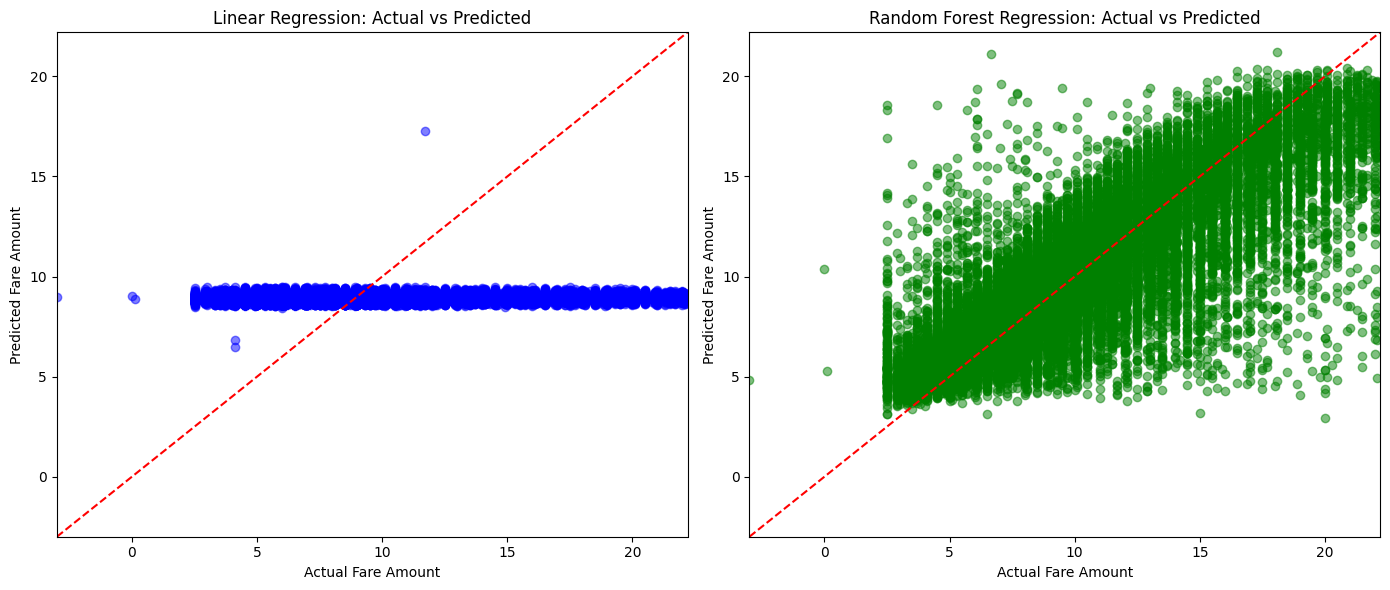

In [51]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values for Linear Regression
plt.figure(figsize=(14, 6))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))

# Plotting Actual vs Predicted values for Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))

plt.tight_layout()
plt.show()


In [ ]:
Certainly! Here’s a concise summary of the theory:

Linear Regression: A statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a straight line. It minimizes the error between predicted and actual values, making it simple and interpretable.

Random Forest Regression: An ensemble method that builds multiple decision trees and combines their outputs. It’s robust, handles non-linear relationships well, and reduces overfitting by averaging predictions across trees, enhancing accuracy.

Both models are evaluated using metrics like R² (explained variance), RMSE (average error), and MAE (mean error), allowing us to compare their performance on fare predictions.